In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, AffinityPropagation, MeanShift, SpectralClustering, AgglomerativeClustering, DBSCAN, OPTICS
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import umap

In [48]:
embeddings_ACCP = pd.read_csv("/neurospin/dico/adufournet/Runs/01_Heritability_Right_PCS_HCP/Output/2024-05-28/10-37-46_1/ACCP_random_epoch70_embeddings/full_embeddings.csv", index_col=0)
labels_ACCP = pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/ACCpatterns/subjects_labels.csv")
labels_ACCP = labels_ACCP[['long_name','Right_PCS']]
def encoder(df, col):
    code = {'present':1,
            'absent':0}
    df[col] = df[col].map(code)
    return df
encoder(labels_ACCP,'Right_PCS') 
embeddings_ACCP.head()

dim1       dim2       dim3       dim4        dim5  \
ID                                                                     
1-03HUBJO_t0  -7.311756   8.848315  11.433768   7.134072  -91.259210   
1-08ANDTI_t0  -5.739025  -5.463870  25.648561  19.749735  -74.616460   
1-11LEBJO_t0 -11.236374   9.308726 -15.308321  -1.321431  -93.494736   
1-15LEHMI_t0  -5.885876  20.141245   0.592449  12.862593 -101.462074   
1-17COLMA_t0   4.352520  24.974628  15.273336  30.816242  -39.304620   

                   dim6       dim7       dim8       dim9      dim10  ...  \
ID                                                                   ...   
1-03HUBJO_t0 -18.157972 -29.667190   2.492262  40.836113  42.298264  ...   
1-08ANDTI_t0 -29.903248   4.258683  26.698858  34.853405   8.576501  ...   
1-11LEBJO_t0 -11.906417  11.564882   8.520532  24.647593   2.096569  ...   
1-15LEHMI_t0 -41.415220 -14.262078  26.112448  10.862076   8.117018  ...   
1-17COLMA_t0 -44.710125 -12.534553  22.059973  15.882281  -5.759472  ...   

                 dim247     dim248     dim249     dim250     dim251  \
ID                                                                    
1-03HUBJO_t0 -43.454285   6.954662  11.661893  -2.860866  -3.028274   
1-08ANDTI_t0  12.682931  15.714107  -0.805301  -6.254668 -27.759030   
1-11LEBJO_t0   6.464665  -0.161006 -20.334795 -20.228899  -1.165458   
1-15LEHMI_t0 -23.265170  -4.511169   1.702151 -28.109070 -28.309748   
1-17COLMA_t0 -21.877821  -9.841561  -2.003409  -4.182606 -10.612120   

                 dim252     dim253     dim254     dim255     dim256  
ID                                                                   
1-03HUBJO_t0  21.849882 -11.048972   6.101158   1.490976  16.269232  
1-08ANDTI_t0  -4.007185 -25.252035  26.590242  30.401512  15.170217  
1-11LEBJO_t0  -7.491628 -14.553023   2.032930  15.613451 -17.675703  
1-15LEHMI_t0  -2.047992   2.830512  17.247581   2.679954  -8.955512  
1-17COLMA_t0  17.957262 -12.909821   8.017523 -21.370860  14.316395  

[5 rows x 256 columns]

In [49]:
embeddings_HCP = pd.read_csv("/neurospin/dico/adufournet/Runs/01_Heritability_Right_PCS_HCP/Output/2024-05-28/10-37-46_1/HCP_random_epoch70_embeddings/full_embeddings.csv", index_col=0)
embeddings_HCP.head()

dim1       dim2       dim3       dim4       dim5       dim6  \
ID                                                                         
100206   3.662126   7.270345 -17.974047  13.036862 -93.442530  15.907052   
100307  -0.757133 -10.785842 -19.401268  -3.720879 -63.860596   4.082394   
100408  15.979092  24.658371 -19.177630  37.449540 -67.879910 -21.836287   
100610   0.766395  21.608131   9.194074  21.821281 -92.347020 -41.194763   
101006  22.542610 -16.562057   8.681931 -10.774280 -60.789670 -13.600296   

             dim7       dim8       dim9      dim10  ...     dim247     dim248  \
ID                                                  ...                         
100206  18.388346  16.628117  12.352726  20.871197  ...   6.066197  39.415783   
100307   9.288305   9.216745  31.577910  -8.101928  ...  14.368784  22.764856   
100408 -11.497456   9.919192  11.659087  -5.847485  ... -35.021046  -1.078634   
100610   5.002573  34.172250   6.581693  17.649540  ...  -8.568071   3.917475   
101006  15.929287  34.043274 -16.377950 -19.675377  ...   4.402154 -18.581505   

           dim249     dim250     dim251     dim252     dim253     dim254  \
ID                                                                         
100206 -18.246626 -11.990428 -20.425930 -13.105765 -20.199528  30.981787   
100307 -33.090350  14.894156   7.468010  11.099421  -9.467532  17.493580   
100408  -0.188224 -16.335041 -35.133183  -7.103259 -17.058847  -5.989140   
100610 -12.112140 -27.931564 -32.332428  -1.110218  -9.942485  26.496422   
101006 -16.850666 -11.853988 -15.233673 -11.366129 -15.618684   2.820296   

           dim255     dim256  
ID                            
100206  26.437515  20.734142  
100307  13.184828   2.114102  
100408  12.906429  18.902271  
100610  11.165738 -11.226829  
101006  -3.603381 -12.569096  

[5 rows x 256 columns]

In [50]:
embeddings_UKB = pd.read_csv("/neurospin/dico/adufournet/Runs/01_Heritability_Right_PCS_HCP/Output/2024-05-28/10-37-46_1/UKB_random_epoch70_embeddings/full_embeddings.csv", index_col=0)
embeddings_UKB.head()

dim1       dim2       dim3       dim4       dim5       dim6  \
ID                                                                              
sub-1000021  16.781584 -24.164783 -10.202497 -14.668247 -86.286670  18.300325   
sub-1000458  17.497766   5.298458  -1.607262  -9.815352 -73.478420  17.533157   
sub-1000575 -10.379858  14.322297  11.714286   9.852574 -85.040970 -49.789250   
sub-1000606  17.303051 -20.377579  25.562141  -3.690826 -75.052320   9.714256   
sub-1000963   0.610229   3.699436   3.470899   6.885089 -67.202515   7.178189   

                  dim7       dim8       dim9      dim10  ...     dim247  \
ID                                                       ...              
sub-1000021  -2.046767  20.087528  18.550674   7.869737  ... -25.987770   
sub-1000458  10.598734  49.060787 -13.265905   1.350521  ... -18.058758   
sub-1000575 -10.995379  24.153574  48.210567  19.725690  ... -33.560375   
sub-1000606   4.846923 -15.058383  11.607415 -12.833521  ...  28.628440   
sub-1000963   7.451188  10.036386  21.320250  16.820965  ... -28.696592   

                dim248     dim249     dim250     dim251     dim252     dim253  \
ID                                                                              
sub-1000021   5.809891  17.479843   8.665139  -5.453529  -7.441020  -6.535634   
sub-1000458  -4.272167   5.279423 -32.203583  -6.947428  -4.865294 -22.237352   
sub-1000575   8.640083 -16.910278   2.288794   6.705114  21.277132 -39.506380   
sub-1000606  21.045542 -17.445766  13.600342 -19.573917   0.353737   3.455596   
sub-1000963  -9.646371  -0.824896  -6.920060  13.483265  16.000612 -12.002774   

                dim254     dim255     dim256  
ID                                            
sub-1000021  11.133840  22.394390   7.154218  
sub-1000458  15.562953   4.319467  -9.371522  
sub-1000575  12.782082   2.898787   2.560465  
sub-1000606  41.339960  -1.983727  20.724482  
sub-1000963   1.919753  -8.436119  10.034264  

[5 rows x 256 columns]

In [51]:
embeddings_UKB.describe()

dim1          dim2          dim3          dim4          dim5  \
count  21052.000000  21052.000000  21052.000000  21052.000000  21052.000000   
mean       5.649835      5.264246      2.590549      8.749427    -65.059453   
std       11.310962     16.516857     15.559691     17.237840     18.261734   
min      -33.651470    -44.959236    -42.857320    -44.901280   -119.764170   
25%       -2.002973     -6.303455     -8.573284     -3.782040    -77.830105   
50%        6.135863      5.534205      2.063084      7.638687    -65.060137   
75%       13.802311     17.030834     13.265596     20.252272    -52.220137   
max       39.753513     57.165955     60.687984     67.719650     -6.207019   

               dim6          dim7          dim8          dim9         dim10  \
count  21052.000000  21052.000000  21052.000000  21052.000000  21052.000000   
mean     -18.055558      2.965644     13.713204     10.797597      0.451840   
std       18.378724     14.521621     17.619362     17.603188     14.084369   
min      -71.658380    -57.673096    -44.019200    -45.463474    -41.256440   
25%      -31.862356     -5.925373      0.829848     -1.517194     -9.561837   
50%      -19.434696      4.305656     13.235243     11.071446      0.023650   
75%       -5.170491     13.332151     26.176007     22.955151      9.988903   
max       43.336056     48.165150     72.654010     70.018265     47.388596   

       ...        dim247        dim248        dim249        dim250  \
count  ...  21052.000000  21052.000000  21052.000000  21052.000000   
mean   ...     -9.673189      0.160100     -6.057100     -8.932833   
std    ...     17.550897     18.419723     13.441899     15.464453   
min    ...    -65.609436    -60.793590    -44.943940    -62.840260   
25%    ...    -22.156038    -12.684226    -15.728293    -19.359992   
50%    ...     -9.971513     -0.424318     -6.248534     -8.358954   
75%    ...      2.336628     12.531666      3.027222      1.933544   
max    ...     44.330593     61.873863     40.874073     43.223150   

             dim251        dim252        dim253        dim254        dim255  \
count  21052.000000  21052.000000  21052.000000  21052.000000  21052.000000   
mean      -7.818964     -0.243055    -10.989930      5.594623     -2.462965   
std       14.013923     13.628388     15.950558     13.795015     17.887916   
min      -53.933407    -49.591316    -67.958910    -32.712715    -63.290688   
25%      -17.636365     -9.546250    -21.953668     -4.684628    -14.972652   
50%       -7.634308     -0.202762    -10.408966      5.212175     -3.028185   
75%        2.320480      9.384017      0.541618     15.206478      9.522354   
max       36.432625     44.557026     38.985508     56.307976     63.496130   

             dim256  
count  21052.000000  
mean       5.186445  
std       12.797763  
min      -44.241860  
25%       -3.220787  
50%        5.615618  
75%       14.186961  
max       42.509070  

[8 rows x 256 columns]

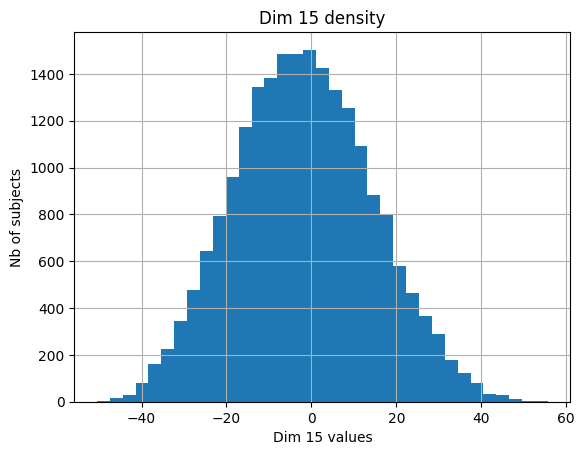

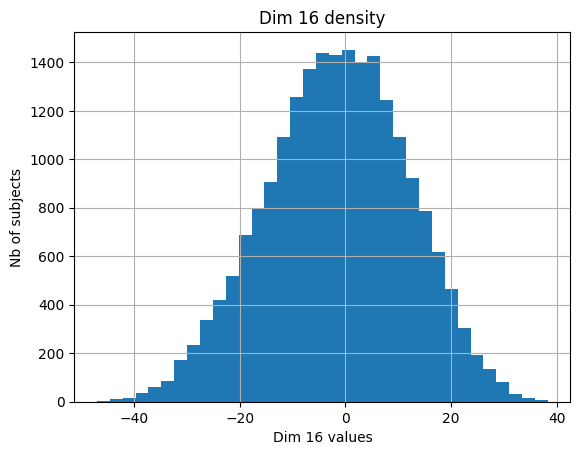

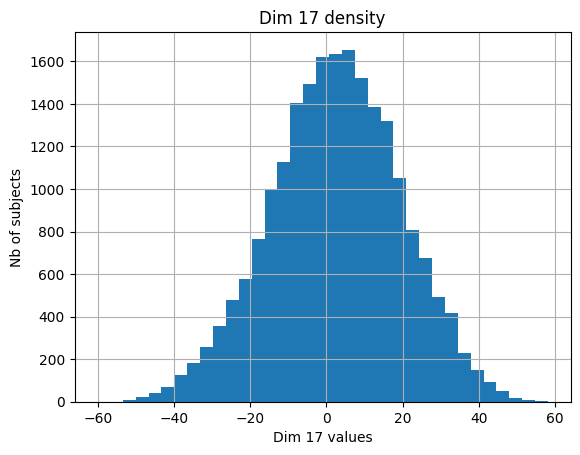

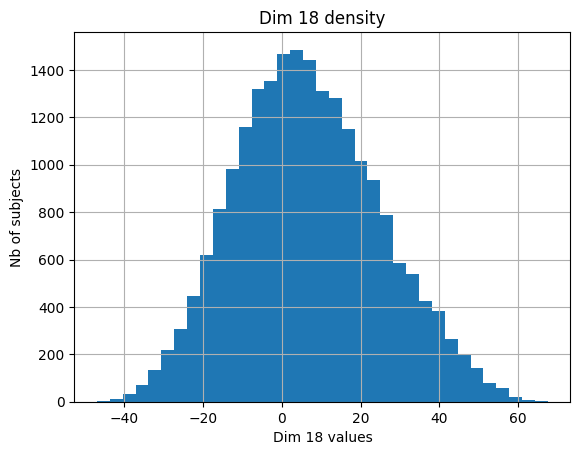

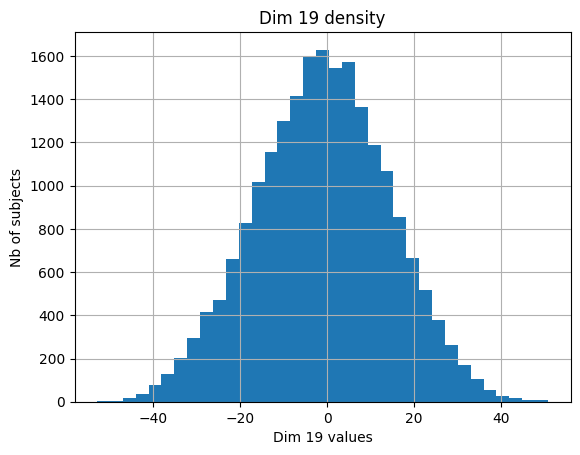

In [52]:
for i in range(15, 20):
    embeddings_UKB[f'dim{i}'].hist(bins=35)
    plt.ylabel(f'Nb of subjects')
    plt.xlabel(f'Dim {i} values')
    plt.title(f'Dim {i} density')
    plt.show()

In [53]:
scaler = StandardScaler()
scaler.fit(embeddings_UKB)

scl_bdd_hcp = scaler.transform(embeddings_HCP)
scl_bdd_ukb = scaler.transform(embeddings_UKB)
scl_bdd_accp = scaler.transform(embeddings_ACCP)

scl_bdd_hcp.shape ,scl_bdd_ukb.shape, scl_bdd_accp.shape

((1114, 256), (21052, 256), (341, 256))

In [54]:
data = scl_bdd_ukb
#data = scl_bdd_accp

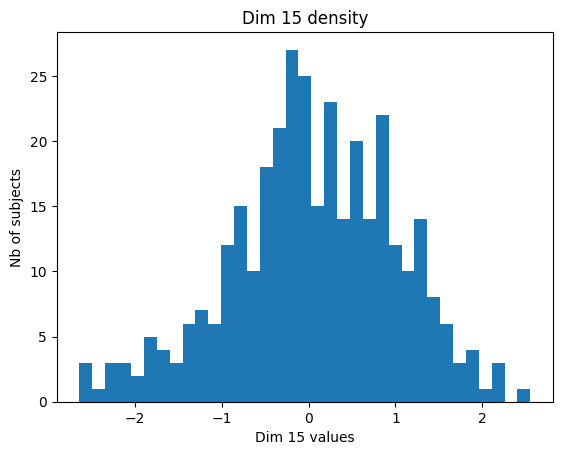

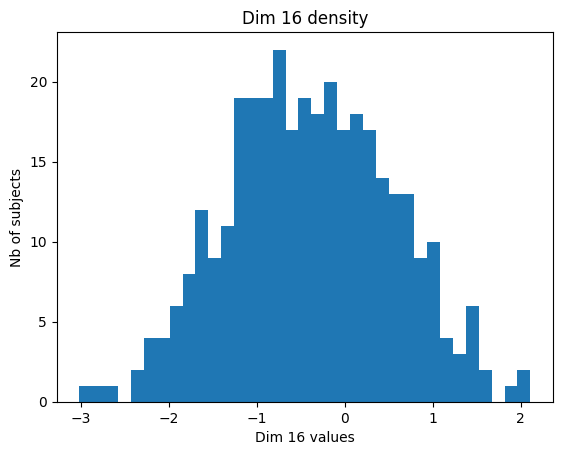

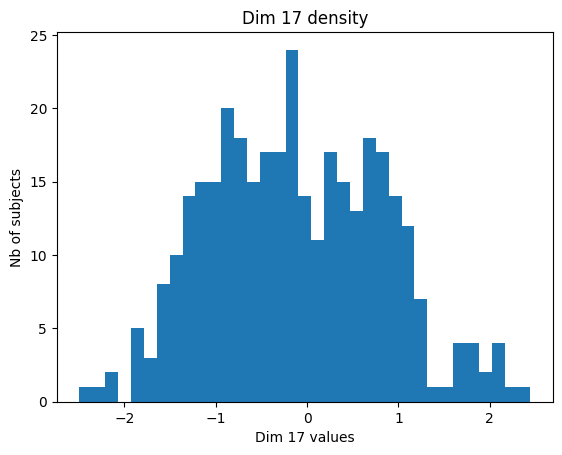

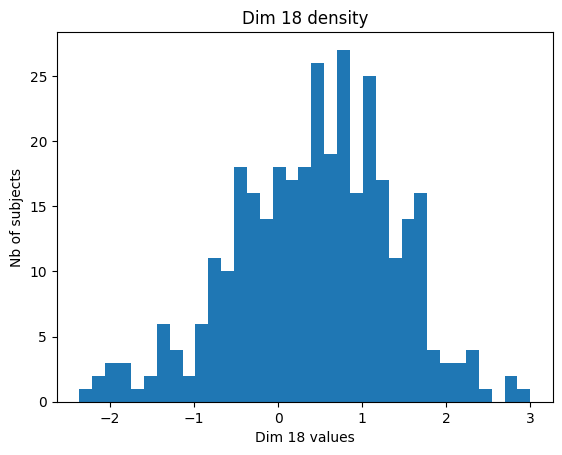

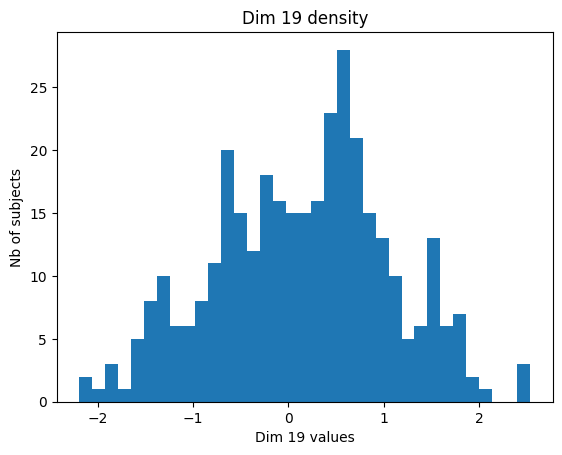

In [55]:
for i in range(15, 20):
    plt.hist(scl_bdd_accp[:,i], bins=35)
    plt.ylabel(f'Nb of subjects')
    plt.xlabel(f'Dim {i} values')
    plt.title(f'Dim {i} density')
    plt.show()

In [56]:
clusterers = {
        "KMeans": KMeans,
        #"AffinityPropagation": AffinityPropagation,
        #"MeanShift": MeanShift,
        #"SpectralClustering": SpectralClustering,
        "AgglomerativeClustering": AgglomerativeClustering,
        #"DBSCAN": DBSCAN,
        #"HDBSCAN": HDBSCAN, 
        #"OPTICS": OPTICS
    }

In [57]:
# Define a function to calculate silhouette scores for different clustering methods
def calculate_clustering_scores(data):     
    results = {}
    
    for name, clusterer in clusterers.items():
        if name == "KMeans":
            best_sil_score = -1
            best_cal_score = -1
            best_n_clusters = None
            for n_clusters in range(2, 30):
                print(f'k-means with {n_clusters} clusters')
                model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1)
                labels = model.fit_predict(data)
                sil_score = silhouette_score(data, labels)
                cal_score = calinski_harabasz_score(data, labels)
                if sil_score > best_sil_score:
                    best_sil_score = sil_score
                    best_cal_score = cal_score
                    best_n_clusters = n_clusters
            results[name] = (best_n_clusters, best_sil_score, best_cal_score)
        elif name == "DBSCAN":
            print(f'DBSCAN')
            model = DBSCAN()
            labels = model.fit_predict(data)
            sil_score = silhouette_score(data, labels) if len(set(labels)) > 1 else -1
            cal_score = calinski_harabasz_score(data, labels) if len(set(labels)) > 1 else -1
            results[name] = (None, sil_score, cal_score)
        else:
            print(f'{name}')
            model = clusterer()
            labels = model.fit_predict(data)
            sil_score = silhouette_score(data, labels) if len(set(labels)) > 1 else -1
            cal_score = calinski_harabasz_score(data, labels) if len(set(labels)) > 1 else -1
            results[name] = (None, sil_score, cal_score)
    
    return results

In [58]:
# Calculate silhouette scores for the HCP data
clustering_scores = calculate_clustering_scores(data)

k-means with 2 clusters
k-means with 3 clusters
k-means with 4 clusters
k-means with 5 clusters
k-means with 6 clusters
k-means with 7 clusters
k-means with 8 clusters
k-means with 9 clusters
k-means with 10 clusters
k-means with 11 clusters
k-means with 12 clusters
k-means with 13 clusters
k-means with 14 clusters
k-means with 15 clusters
k-means with 16 clusters
k-means with 17 clusters
k-means with 18 clusters
k-means with 19 clusters
k-means with 20 clusters
k-means with 21 clusters
k-means with 22 clusters
k-means with 23 clusters
k-means with 24 clusters
k-means with 25 clusters
k-means with 26 clusters
k-means with 27 clusters
k-means with 28 clusters
k-means with 29 clusters
AgglomerativeClustering


In [59]:
# Print the results
for name, (n_clusters, sil_score, cal_score) in clustering_scores.items():
    print(f"{name}: Best number of clusters = {n_clusters}, Silhouette score = {sil_score:.2f}, Calinski-Harabasz score = {cal_score:.2f}")

KMeans: Best number of clusters = 7, Silhouette score = 0.07, Calinski-Harabasz score = 1013.90
AgglomerativeClustering: Best number of clusters = None, Silhouette score = 0.04, Calinski-Harabasz score = 845.95


In [60]:
# Visualize the clusters using UMAP
reducer = umap.UMAP()
reducer.fit(scl_bdd_ukb)

UMAP(tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [61]:
bdd_2D_HCP = reducer.transform(scl_bdd_hcp)
bdd_2D_UKB = reducer.transform(scl_bdd_ukb)
bdd_2D_ACCP = reducer.transform(scl_bdd_accp)

bdd_2D_HCP = pd.DataFrame(bdd_2D_HCP, columns=['Dim 1', 'Dim 2'])
bdd_2D_UKB = pd.DataFrame(bdd_2D_UKB, columns=['Dim 1', 'Dim 2'])
bdd_2D_ACCP = pd.DataFrame(bdd_2D_ACCP, columns=['Dim 1', 'Dim 2'])

bdd_2D_HCP['Dataset'] = 'hcp'
bdd_2D_UKB['Dataset'] = 'UkBioBank'
bdd_2D_ACCP['Dataset'] = 'ACCpatterns'

bdd_2D_HCP['ID'] = embeddings_HCP.index
bdd_2D_UKB['ID'] = embeddings_UKB.index
bdd_2D_UKB['ID'] = bdd_2D_UKB["ID"].apply(lambda x: x[4:])
bdd_2D_UKB['ID'] = bdd_2D_UKB["ID"].astype(int)
bdd_2D_ACCP['ID'] = embeddings_ACCP.index

pred_HCP = pd.read_csv('/neurospin/dico/adufournet/Runs/01_Heritability_Right_PCS_HCP/Heritability/data/HCP_binary_pred_PCS.csv')
pred_UKB = pd.read_csv('/neurospin/dico/adufournet/Runs/01_Heritability_Right_PCS_HCP/Heritability/data/UKB_right_binary_pred.csv')


bdd_2D_HCP = pd.merge(left=bdd_2D_HCP,right=pred_HCP, how='inner', left_on='ID', right_on='IID')
bdd_2D_UKB = pd.merge(left=bdd_2D_UKB,right=pred_UKB, how='inner', left_on='ID', right_on='IID')
bdd_2D_ACCP = pd.merge(left=bdd_2D_ACCP, right=labels_ACCP, left_on='ID', right_on='long_name')

bdd_2D_HCP['Pred'] = bdd_2D_HCP['Pred'].astype(str)
bdd_2D_UKB['Binary_Pred'] = bdd_2D_UKB['Right_Binary_Pred'].astype(str)
bdd_2D_ACCP['Right_PCS'] = bdd_2D_ACCP['Right_PCS'].astype(str)


In [62]:
def visualize_clusters(data, classes, title):
    
    fig = px.scatter(
        data, x='Dim 1', y='Dim 2', 
        color=classes,
        title=title,
        labels={'0': 'dim 1', '1': 'dim 2'},
        hover_data= ['Dataset', 'ID'],
        opacity=0.5,
        width=800, height=600
)
    fig.show()

In [63]:
# Visualize the best clustering results
for name, (n_clusters, sil_score, cal_score) in clustering_scores.items():
    if n_clusters:
        model = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=1)
        labels = model.fit_predict(data)
    elif name == "DBSCAN":
        model = DBSCAN()
        labels = model.fit_predict(data)
    else:
        model = globals()[name]()
        labels = model.fit_predict(data)

    labels = labels.astype(str)    
    visualize_clusters(bdd_2D_UKB, labels, f"{name} (Silhouette score = {sil_score:.2f}, Calinski-Harabasz score = {cal_score:.2f})")

In [64]:
visualize_clusters(bdd_2D_UKB, 'Binary_Pred', 'UKB right PCS prediction')

#### Let's see the accuracy of the automatic clustering regarding to the prediction of having a PCS as the ground truth.

On UKB:

In [65]:
agglo_model = AgglomerativeClustering()
agglo_labels = agglo_model.fit_predict(data)
print('Percentage of matching labels:')
print((bdd_2D_UKB['Binary_Pred'].astype(int).to_numpy() == agglo_labels).sum() / len(agglo_labels))

Percentage of matching labels:
0.5084552536576097


With an Agglomerative Clustering model fit on UKB used on ACCP: NOT POSSIBLE !  
THEREFORE ONLY A MODEL TRAINED ON ACCP FOR ACCP

In [66]:
automatic_labels = agglo_model.fit_predict(scl_bdd_accp)
print('Percentage of matching labels')
print((bdd_2D_ACCP['Right_PCS'].astype(int).to_numpy() == automatic_labels).sum() / len(automatic_labels))

Percentage of matching labels
0.44574780058651026


In [67]:
kmeans_model = KMeans(n_clusters=2, init='k-means++', max_iter=500, n_init=1)
labels = kmeans_model.fit_predict(data)
print('Percentage of matching labels')
print((bdd_2D_UKB['Binary_Pred'].astype(int).to_numpy() == labels).sum() / len(labels))

Percentage of matching labels
0.4544461333840015


In [68]:
kmeans_model.cluster_centers_.shape

(2, 256)

GENERALISATION ISSUES !

In [69]:
automatic_labels = kmeans_model.predict(scl_bdd_accp)
print('Percentage of matching labels')
print((bdd_2D_ACCP['Right_PCS'].astype(int).to_numpy() == automatic_labels).sum() / len(automatic_labels))

Percentage of matching labels
0.4750733137829912


Pourcentage of matching labels for the kmeans and agglomerative methods :

In [70]:
print('Percentage of matching labels')
print((agglo_labels == labels).sum() / len(labels))

Percentage of matching labels
0.6883431502945089


#### See how the KMEANS clustering evolves depending on the number of clusters

In [71]:
n_clusters_range = range(2,20)

silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []

for n_clusters in n_clusters_range:
    model = KMeans(n_clusters=n_clusters, random_state=42, init="k-means++")
    labels = model.fit_predict(data)
        
    sil_score = silhouette_score(data, labels)
    cal_score = calinski_harabasz_score(data, labels)
    dav_score = davies_bouldin_score(data, labels)
        
    silhouette_scores.append(sil_score)
    calinski_harabasz_scores.append(cal_score)
    davies_bouldin_scores.append(dav_score)

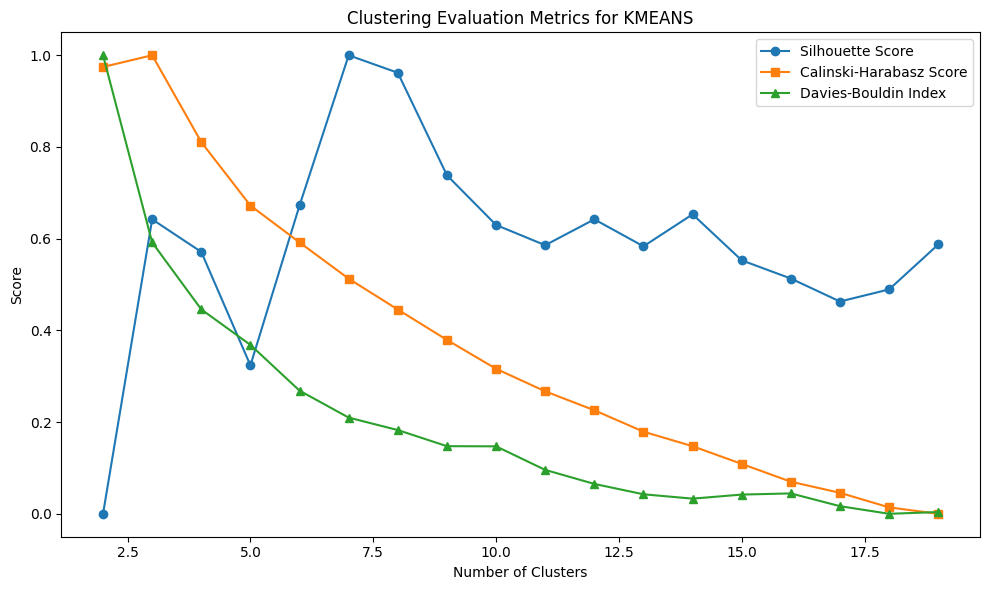

In [72]:
minmaxscaler = MinMaxScaler()

silhouette_scores = np.array(silhouette_scores)
calinski_harabasz_scores = np.array(calinski_harabasz_scores)
davies_bouldin_scores = np.array(davies_bouldin_scores)

silhouette_scores = minmaxscaler.fit_transform(silhouette_scores.reshape(-1, 1))
calinski_harabasz_scores = minmaxscaler.fit_transform(calinski_harabasz_scores.reshape(-1, 1))
davies_bouldin_scores = minmaxscaler.fit_transform(davies_bouldin_scores.reshape(-1, 1))


# Plot the results
fig, axes = plt.subplots(1, 1, figsize=(10, 6))


ax = axes
    
ax.plot(n_clusters_range, silhouette_scores, label='Silhouette Score', marker='o')
ax.plot(n_clusters_range, calinski_harabasz_scores, label='Calinski-Harabasz Score', marker='s')
ax.plot(n_clusters_range, davies_bouldin_scores, label='Davies-Bouldin Index', marker='^')

ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Score')
ax.set_title(f'Clustering Evaluation Metrics for KMEANS')
ax.legend()

plt.tight_layout()
plt.show()

#### See how the Agglomerative Clustering evolves depending on its hyper parameters

In [ ]:
metrics = {"euclidean", "cosine"}
n_clusters_range = range(2, 20)
linkages = {"ward", "complete", "average", "single"}

silhouette_scores = {metric: [] for metric in metrics}
calinski_harabasz_scores = {metric: [] for metric in metrics}
davies_bouldin_scores = {metric: [] for metric in metrics}

for metric in metrics:
    for n_clusters in n_clusters_range:
        model = AgglomerativeClustering(n_clusters=n_clusters, metric=metric, linkage='average')
        labels = model.fit_predict(data)
        
        sil_score = silhouette_score(data, labels, metric=metric)
        cal_score = calinski_harabasz_score(data, labels)
        dav_score = davies_bouldin_score(data, labels)
        
        silhouette_scores[metric].append(sil_score)
        calinski_harabasz_scores[metric].append(cal_score)
        davies_bouldin_scores[metric].append(dav_score)

fig, axes = plt.subplots(len(metrics), 1, figsize=(10, len(metrics) * 6))

for i, metric in enumerate(metrics):
    ax = axes[i]
    
    ax.scatter(n_clusters_range, silhouette_scores[metric], label='Silhouette Score', marker='o')
    ax.scatter(n_clusters_range, calinski_harabasz_scores[metric], label='Calinski-Harabasz Score', marker='s')
    ax.scatter(n_clusters_range, davies_bouldin_scores[metric], label='Davies-Bouldin Index', marker='^')

    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel('Score')
    ax.set_title(f'Clustering Evaluation Metrics for {metric} Metric')
    ax.legend()

plt.tight_layout()
plt.show()

In [73]:
model = AgglomerativeClustering(n_clusters=2, metric='cosine', linkage='average')
labels = model.fit_predict(scl_bdd_accp)
visualize_clusters(bdd_2D_ACCP, labels,'Cosine metric for 2 clusters')

In [74]:
bdd_2D_HCP['Pred'].mean()

inf

<Figure size 640x480 with 0 Axes>

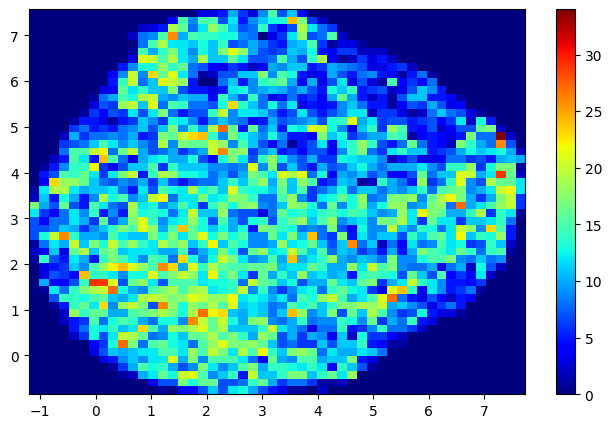

In [75]:
import matplotlib.cm as cm
heatmap, xedges, yedges = np.histogram2d(bdd_2D_UKB['Dim 1'], bdd_2D_UKB['Dim 2'], bins=(50,50))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
plt.figure(figsize=(8,5))
plt.imshow(heatmap.T, origin='lower', extent=extent, aspect='auto', cmap=cm.jet)
# plt.figure(figsize=(8,100))
plt.colorbar()
plt.show()